## libraries


In [ ]:
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




##Data

In [ ]:
accidents_df = read.csv('/content/accident_data_pruned.csv')

In [ ]:
accidents_df %>% head

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,2016-02-08 00:37:08,40.10891,-83.09286,3.230,1,Dublin,Franklin,OH,43017,⋯,0,0,0,0,0,0,0,0,0,0
2,2,2016-02-08 05:56:20,39.86542,-84.06280,0.747,1,Dayton,Montgomery,OH,45424,⋯,0,0,0,0,0,0,0,0,0,0
3,2,2016-02-08 06:15:39,39.10266,-84.52468,0.055,1,Cincinnati,Hamilton,OH,45203,⋯,1,0,0,0,0,0,0,0,0,0
4,2,2016-02-08 06:51:45,41.06213,-81.53784,0.123,1,Akron,Summit,OH,44311,⋯,0,0,0,0,0,0,0,0,0,0
5,3,2016-02-08 07:53:43,39.17239,-84.49279,0.500,1,Cincinnati,Hamilton,OH,45217,⋯,0,0,0,0,0,0,0,0,0,1
6,2,2016-02-08 08:16:57,39.06324,-84.03243,1.427,1,Williamsburg,Clermont,OH,45176,⋯,0,0,0,0,0,0,0,1,0,1


In [ ]:
dim(accidents_df)

[1] 169332     31

In [ ]:
accidents_df %>% filter(weather == "") %>% nrow

[1] 4040

In [ ]:
as.data.frame(table(accidents_df$weather))
#cleaned in R and grouped in tableau

Var1,Freq
<fct>,<int>
,4040
Blowing Dust,1
Blowing Dust / Windy,1
Blowing Snow,16
Clear,61164
Cloudy,328
Cloudy / Windy,6
Drizzle,113
Fair,849


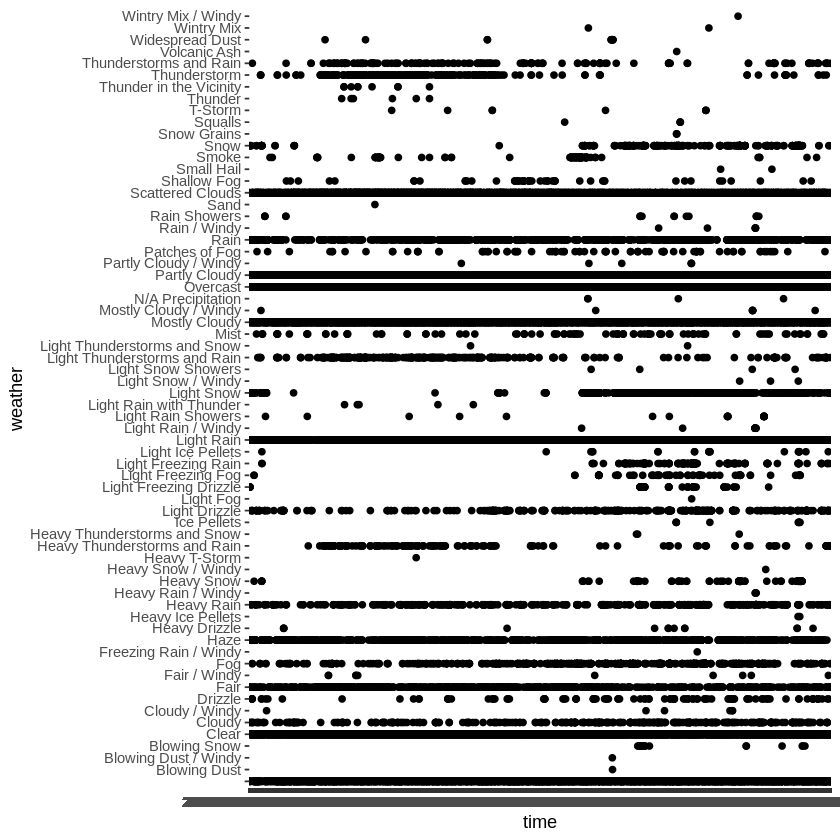

In [ ]:
ggplot(accidents_df, aes(x=time, y=weather)) + geom_point()
#needs to be cleaned

In [ ]:
accidents_df[grep("snow", accidents_df$weather, ignore.case =T), ] %>% head

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,2,2016-02-08 11:51:46,41.37531,-81.82017,0.521,1,Cleveland,Cuyahoga,OH,44130,⋯,1,0,0,0,0,0,0,0,0,1
10,2,2016-02-08 15:16:43,40.10931,-82.96849,0.826,1,Westerville,Franklin,OH,43081,⋯,0,0,0,0,0,0,0,0,0,1
11,2,2016-02-08 15:43:50,39.19288,-84.47723,0.307,1,Cincinnati,Hamilton,OH,45216,⋯,0,0,0,0,0,0,0,0,0,1
13,2,2016-02-08 17:27:39,41.47390,-81.70423,0.070,1,Cleveland,Cuyahoga,OH,44113,⋯,0,0,0,0,0,0,0,0,0,1
14,2,2016-02-08 17:30:18,39.58224,-83.67781,2.590,1,Jamestown,Greene,OH,45335,⋯,0,0,0,0,0,0,0,0,0,1
19,3,2016-02-08 20:13:22,40.02664,-82.99440,0.999,1,Columbus,Franklin,OH,43224,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
accidents_df[grep("rain", accidents_df$weather, ignore.case =T), ] %>% head

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,2016-02-08 00:37:08,40.10891,-83.09286,3.230,1,Dublin,Franklin,OH,43017,⋯,0,0,0,0,0,0,0,0,0,0
2,2,2016-02-08 05:56:20,39.86542,-84.06280,0.747,1,Dayton,Montgomery,OH,45424,⋯,0,0,0,0,0,0,0,0,0,0
5,3,2016-02-08 07:53:43,39.17239,-84.49279,0.500,1,Cincinnati,Hamilton,OH,45217,⋯,0,0,0,0,0,0,0,0,0,1
348,3,2016-02-21 09:27:15,38.13078,-81.38888,0.176,1,Hansford,Kanawha,WV,25103,⋯,0,0,0,0,0,0,0,0,0,1
349,2,2016-02-21 09:51:39,38.54519,-85.77861,1.008,1,Henryville,Clark,IN,47126,⋯,0,0,0,0,0,0,0,0,0,1
350,2,2016-02-21 12:30:41,38.36243,-81.71443,0.297,1,South Charleston,Kanawha,WV,25303,⋯,0,0,0,0,0,0,0,0,0,1


In [ ]:
unique(accidents_df$weather)

[1] "Light Rain"                   "Overcast"                    
 [3] "Mostly Cloudy"                "Snow"                        
 [5] "Light Snow"                   "Cloudy"                      
 [7] ""                             "Scattered Clouds"            
 [9] "Clear"                        "Partly Cloudy"               
[11] "Light Freezing Drizzle"       "Light Drizzle"               
[13] "Haze"                         "Rain"                        
[15] "Heavy Rain"                   "Fair"                        
[17] "Drizzle"                      "Fog"                         
[19] "Thunderstorms and Rain"       "Patches of Fog"              
[21] "Light Thunderstorms and Rain" "Mist"                        
[23] "Rain Showers"                 "Light Rain Showers"          
[25] "Heavy Drizzle"                "Smoke"                       
[27] "Light Freezing Fog"           "Light Freezing Rain"         
[29] "Blowing Snow"                 "Heavy Thunderstorms and Rain"
[31] "Heavy Snow"                   "Snow Grains"                 
[33] "Squalls"                      "Light Fog"                   
[35] "Shallow Fog"                  "Thunderstorm"                
[37] "Light Ice Pellets"            "Thunder"                     
[39] "Thunder in the Vicinity"      "Fair / Windy"                
[41] "Light Rain with Thunder"      "Heavy Thunderstorms and Snow"
[43] "Light Snow Showers"           "Cloudy / Windy"              
[45] "Ice Pellets"                  "N/A Precipitation"           
[47] "Light Thunderstorms and Snow" "T-Storm"                     
[49] "Rain / Windy"                 "Wintry Mix"                  
[51] "Partly Cloudy / Windy"        "Heavy T-Storm"               
[53] "Sand"                         "Light Rain / Windy"          
[55] "Widespread Dust"              "Mostly Cloudy / Windy"       
[57] "Blowing Dust / Windy"         "Blowing Dust"                
[59] "Volcanic Ash"                 "Freezing Rain / Windy"       
[61] "Small Hail"                   "Wintry Mix / Windy"          
[63] "Light Snow / Windy"           "Heavy Ice Pellets"           
[65] "Heavy Snow / Windy"           "Heavy Rain / Windy"

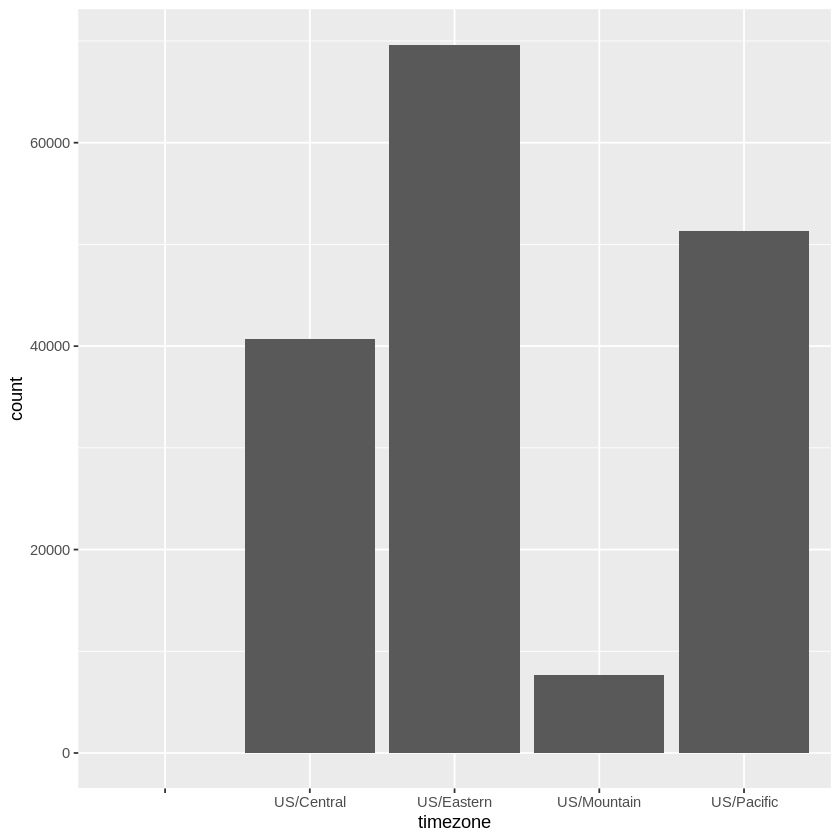

In [ ]:
ggplot(accidents_df, aes(x=timezone)) + geom_bar()

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


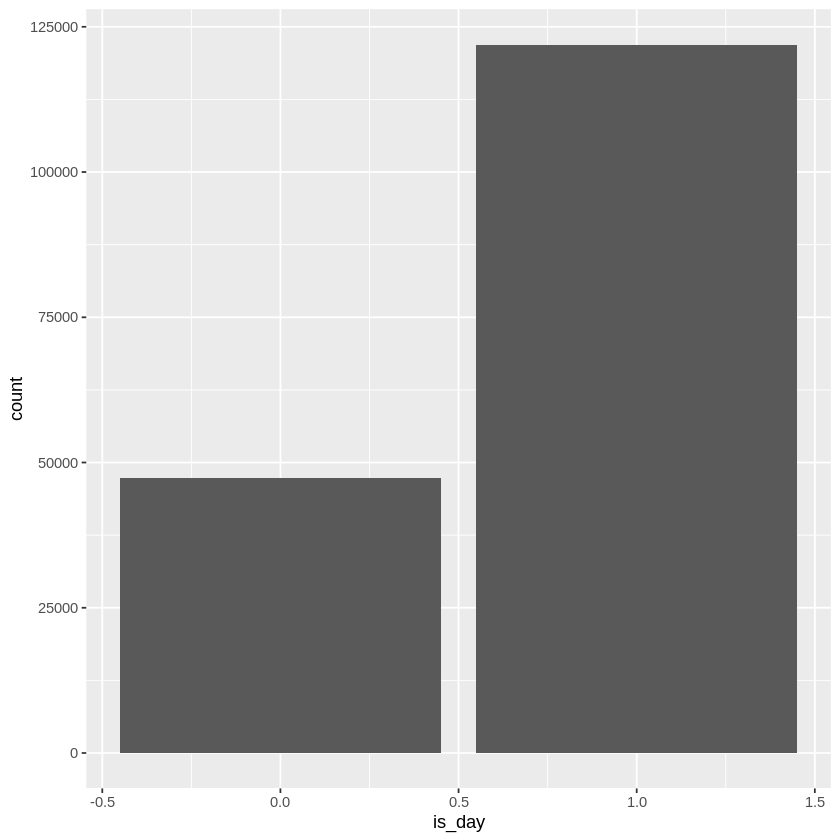

In [ ]:
ggplot(accidents_df, aes(x=is_day)) + geom_bar()

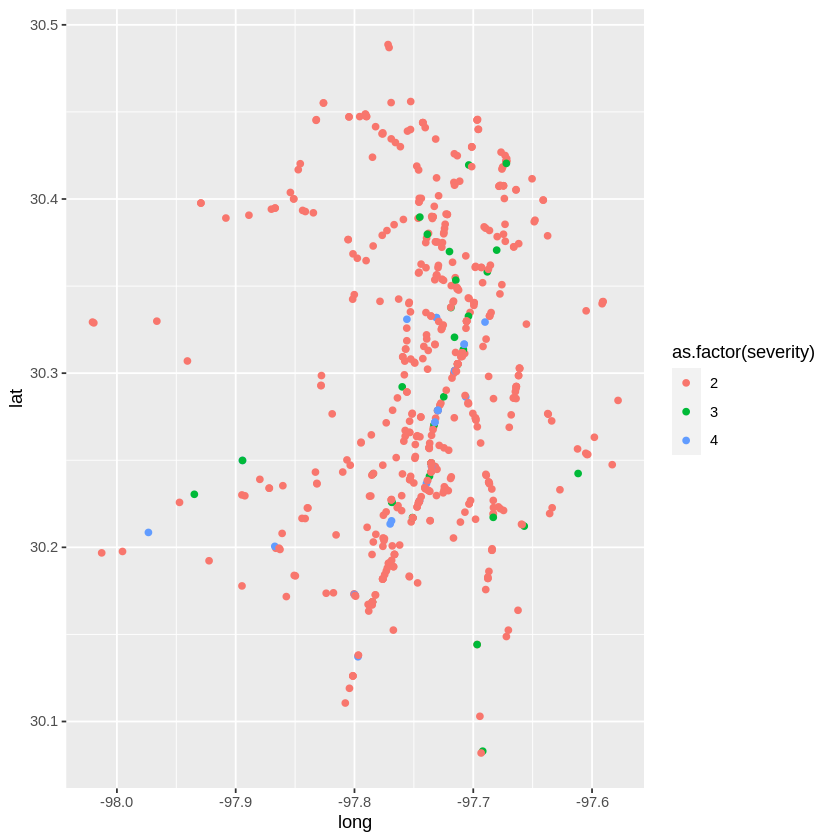

In [ ]:
df.austin = accidents_df %>% filter(30 <lat, lat < 32.5, -100 < long, long < -95)
df.austin = df.austin %>% filter(city == "Austin")
ggplot(df.austin) + geom_point(aes(x=long, y=lat, color=as.factor(severity)))

##Texas

In [ ]:
accidents_df[which(accidents_df$state == "TX"), ]

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
11780,2,2016-11-30 15:29:48,32.84365,-96.77463,1.915,1,Dallas,Dallas,TX,75205,⋯,1,0,0,0,0,0,0,0,0,1
11781,2,2016-11-30 15:41:16,32.84662,-96.63736,0.021,1,Dallas,Dallas,TX,75228,⋯,0,0,0,0,0,0,0,0,0,1
11782,3,2016-11-30 15:15:48,32.86693,-96.66617,0.616,1,Garland,Dallas,TX,75041,⋯,0,0,0,0,0,0,0,0,0,1
11785,2,2016-11-30 15:35:51,32.79426,-97.21214,0.470,1,Fort Worth,Tarrant,TX,76118,⋯,1,0,0,0,0,0,0,0,0,1
11787,2,2016-11-30 16:16:05,32.81235,-97.31399,0.885,1,Fort Worth,Tarrant,TX,76137,⋯,1,0,0,0,0,0,0,0,0,1
11788,3,2016-11-30 16:16:05,32.79385,-96.70278,0.502,1,Dallas,Dallas,TX,75228,⋯,1,0,0,0,0,0,0,0,0,1
11789,3,2016-11-30 16:16:05,32.85710,-96.77046,0.769,1,Dallas,Dallas,TX,75225,⋯,0,0,0,0,0,0,0,1,0,1
11792,3,2016-11-30 16:21:05,32.87684,-96.81001,0.222,1,Dallas,Dallas,TX,75225,⋯,0,0,0,0,0,0,0,0,0,1
11796,3,2016-11-30 16:42:06,32.93410,-96.90182,0.514,1,Dallas,Dallas,TX,75234,⋯,0,0,0,0,0,0,0,0,0,1


In [ ]:
dim(texas_df)

[1] 13591    31

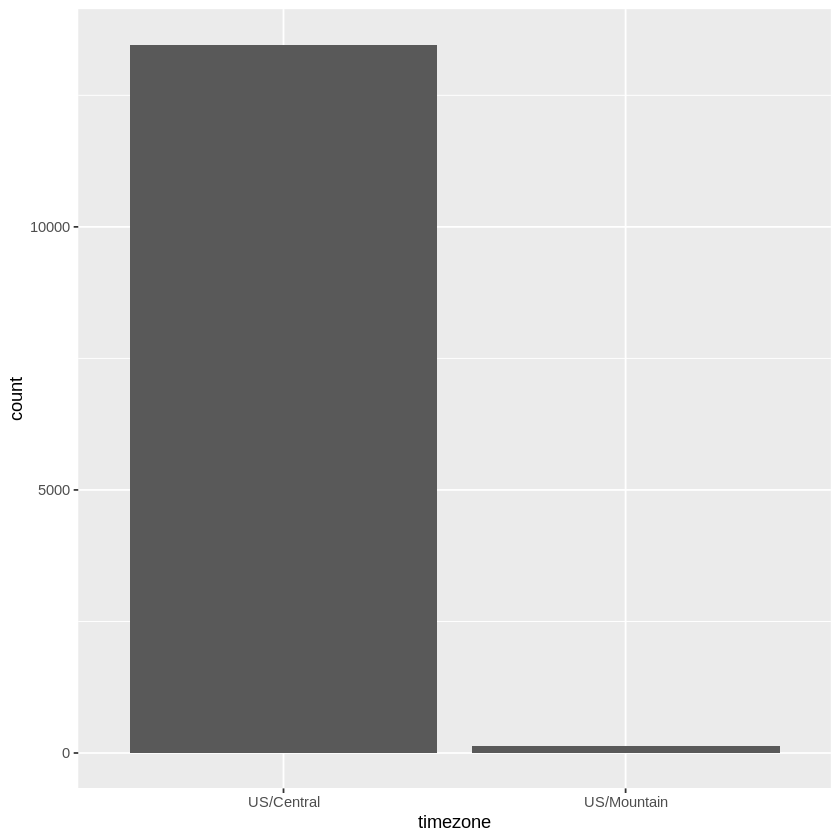

In [ ]:
ggplot(texas_df, aes(x=timezone)) + geom_bar()

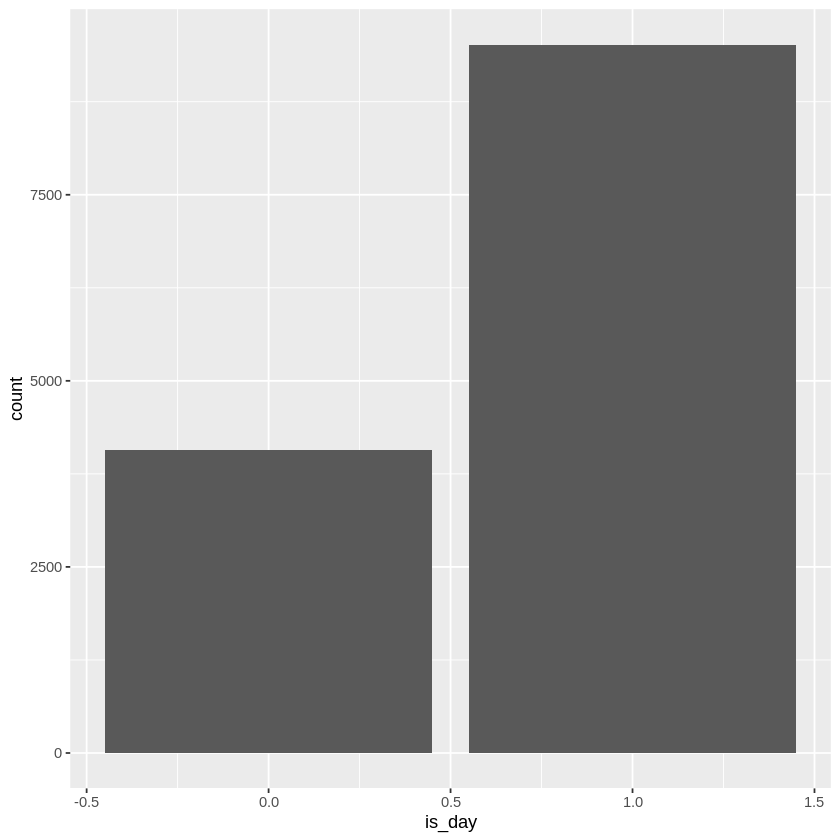

In [ ]:
ggplot(texas_df, aes(x=is_day)) + geom_bar()

In [ ]:
texas_df = accidents_df[which(accidents_df$state == "TX"), ]
#save all the accidents that have state name Texas

In [ ]:
texas_df %>% head

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
11780,2,2016-11-30 15:29:48,32.84365,-96.77463,1.915,1,Dallas,Dallas,TX,75205,⋯,1,0,0,0,0,0,0,0,0,1
11781,2,2016-11-30 15:41:16,32.84662,-96.63736,0.021,1,Dallas,Dallas,TX,75228,⋯,0,0,0,0,0,0,0,0,0,1
11782,3,2016-11-30 15:15:48,32.86693,-96.66617,0.616,1,Garland,Dallas,TX,75041,⋯,0,0,0,0,0,0,0,0,0,1
11785,2,2016-11-30 15:35:51,32.79426,-97.21214,0.470,1,Fort Worth,Tarrant,TX,76118,⋯,1,0,0,0,0,0,0,0,0,1
11787,2,2016-11-30 16:16:05,32.81235,-97.31399,0.885,1,Fort Worth,Tarrant,TX,76137,⋯,1,0,0,0,0,0,0,0,0,1
11788,3,2016-11-30 16:16:05,32.79385,-96.70278,0.502,1,Dallas,Dallas,TX,75228,⋯,1,0,0,0,0,0,0,0,0,1


In [ ]:
write.csv(texas_df, 'texas_df.csv')

In [ ]:
accidents_df[which(accidents_df$city == "Austin" & accidents_df$state == "TX"), ]

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
11880,2,2016-12-01 10:53:26,30.27696,-97.75136,0.126,1,Austin,Travis,TX,78703,⋯,0,0,0,0,0,0,0,1,0,1
11881,2,2016-12-01 10:52:07,30.36851,-97.80124,0.509,0,Austin,Travis,TX,78730,⋯,0,0,0,0,0,0,0,0,0,1
11884,2,2016-12-01 11:47:25,30.34254,-97.76279,0.279,1,Austin,Travis,TX,78731,⋯,0,0,0,0,0,0,0,1,0,1
11885,2,2016-12-01 11:47:25,30.25650,-97.61220,1.519,0,Austin,Travis,TX,78725,⋯,0,0,0,0,0,0,0,0,0,1
11945,2,2016-12-02 04:40:19,30.18214,-97.68769,0.049,0,Austin,Travis,TX,78744,⋯,0,0,0,0,0,0,0,0,0,0
11951,2,2016-12-02 06:04:24,30.14418,-97.69672,1.970,0,Austin,Travis,TX,78744,⋯,0,0,0,0,0,0,0,0,0,0
12048,2,2016-12-02 18:32:52,30.39766,-97.92928,0.001,0,Austin,Travis,TX,78734,⋯,0,0,0,0,0,0,0,0,0,0
12333,2,2016-12-06 06:42:02,30.27029,-97.73300,0.193,1,Austin,Travis,TX,78701,⋯,0,0,0,0,0,0,0,0,0,0
12401,2,2016-12-06 13:29:26,30.16861,-97.78489,1.392,1,Austin,Travis,TX,78744,⋯,0,0,0,0,0,0,0,0,0,1


In [ ]:
austin_Df = accidents_df[which(accidents_df$city == "Austin" & accidents_df$state == "TX"), ]

In [ ]:
austin_Df %>% head

,severity,time,lat,long,dist_mi,is_right_side,city,county,state,zip,⋯,junction,no_exit,railway,tcircle,station,stop,tcalming,tsignal,turning_loop,is_day
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
11880,2,2016-12-01 10:53:26,30.27696,-97.75136,0.126,1,Austin,Travis,TX,78703,⋯,0,0,0,0,0,0,0,1,0,1
11881,2,2016-12-01 10:52:07,30.36851,-97.80124,0.509,0,Austin,Travis,TX,78730,⋯,0,0,0,0,0,0,0,0,0,1
11884,2,2016-12-01 11:47:25,30.34254,-97.76279,0.279,1,Austin,Travis,TX,78731,⋯,0,0,0,0,0,0,0,1,0,1
11885,2,2016-12-01 11:47:25,30.25650,-97.61220,1.519,0,Austin,Travis,TX,78725,⋯,0,0,0,0,0,0,0,0,0,1
11945,2,2016-12-02 04:40:19,30.18214,-97.68769,0.049,0,Austin,Travis,TX,78744,⋯,0,0,0,0,0,0,0,0,0,0
11951,2,2016-12-02 06:04:24,30.14418,-97.69672,1.970,0,Austin,Travis,TX,78744,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
unique(austin_Df$state)

[1] "TX"

In [ ]:
unique(austin_Df$city)

[1] "Austin"

In [ ]:
write.csv(austin_Df, 'austin_Df.csv')

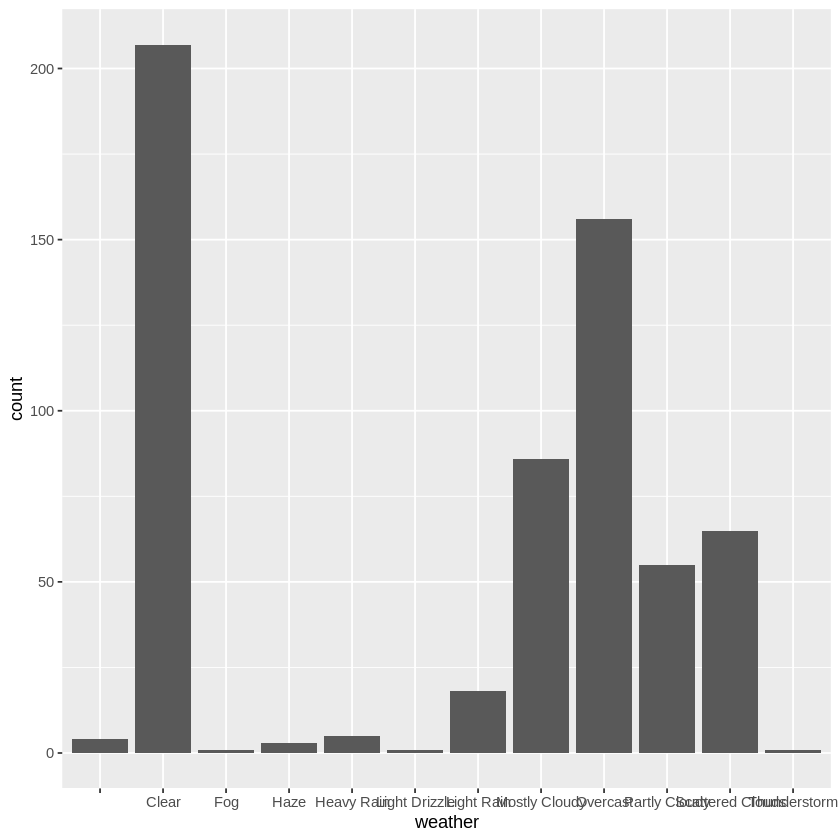

In [ ]:
ggplot(austin_Df, aes(x=weather)) + geom_bar()

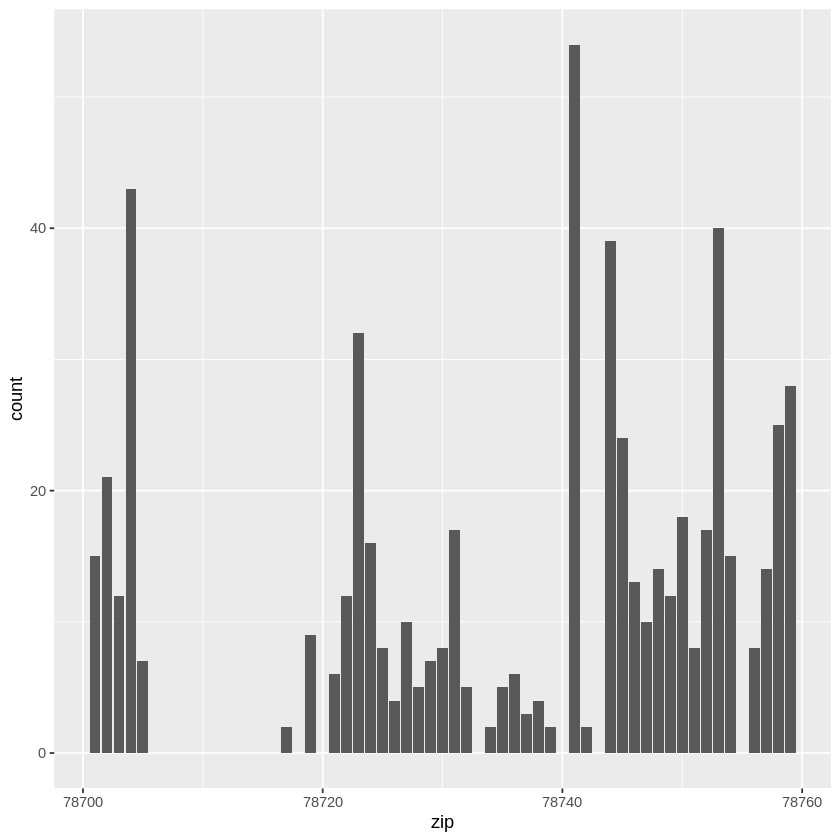

In [ ]:
ggplot(austin_Df, aes(x=zip)) + geom_bar()